# Практическая работа №3: Статистический анализ социальных сетей
Выполнила студентка гр. 0383 Куртова Карина. Вариант №57

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

**Диада** $-$ элемент сети, представляющий собой пару акторов и (возможную) связь между ними: $D_{ij}=(X_{ij}, X_{ji}), i\neq j$.

**Цензус диад** $-$ тройка чисел $M, A, N$, где:

$M = \sum_{i<j} X_{ij} X_{ji}$

$A = X_{++} - 2M$

$N = C^2_g - A - M$

**Индекс взаимности Каца-Пауэлла** (Reciprocity of Katz and Powell) $-$ характеристика измерения тенденции акторов в группе. Данный индекс оценивает тенденцию акторов в группе к взаимному выбору друг друга. 

$-\infty < \rho_{кр} \leqslant 1$.

Если $\rho_{кр} = 0$, то акторы не имеют склонности взаимно выбирать друг друга.

Если $\rho_{кр} = 1$, то акторы показывают максимальную тенденцию к взаимному выбору друг друга.

Если $\rho_{кр} < 0$, то акторы склонны образовывать односторонние связи или не образовывать их вообще.

Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом. Выбор может быть фиксированным или свободным.

Для фиксированного выбора из $d$ акторов:

По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)M - gd^2}{gd(g - d - 1)}}$.

Вероятность того, что связь будет взаимной для двух акторов:

$\displaystyle{P(i \rightarrow j \wedge j \rightarrow i) = \frac{d}{g - 1}\left( \frac{d}{g - 1} + \rho_{кр} \frac{g - 1 - d}{g - 1} \right)}.$

Для свободного выбора:

По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 - L_2}}$.

Вероятность того, что связь будет взаимной для двух акторов (для каждого из акторов):

$P = \displaystyle{\frac{x_{i+}x_{j+}}{(g - 1)^2}}.$

**Индекс взаимности Бандиопадхьяйя** $-$ индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}},$

где $M_{\min} = \max f(t), 0 \leqslant t \leqslant g$, 

$M_{\max} = \lfloor 0.5 \sum^g_{i = 1} x_{i+} - \max g(t)\rfloor, 0 \leqslant t \leqslant g,$

$f(t) = \sum^t_{i=1} x_{i+} - t(g - 1) - C^2_g,$

$g(t) = \sum^t_{i=1} x_{i+} - t(t - 1) - \sum^g_{i=t+1} \min (t, x_{i+}).$

**Вычисление доверительного интервала для оценки P.**

Оценка параметра $P$:

$\hat{P} = \displaystyle{\frac{\sum_{i = 1}^g \sum_{j = 1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g - 1)}}.$

Доверительный интервал: $\hat{P}_{lower} \leqslant P \leqslant \hat{P}_{upper}$.

$\hat{P}_{lower} = \displaystyle{\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$\hat{P}_{lower} = \displaystyle{\hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$z_{\alpha/2}$ вычисляется из $\Phi(z_{\alpha/2}) = 0.5 - 0.5 \alpha$, где $\alpha - $ некоторый уровень значимости, $(1 - \alpha) - $ доверительная надёжность. 

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
Перед началом работы загрузим все необходимые пакеты и обозначим используемые библиотеки.

In [ ]:
library(igraph)
library(statnet)

**Задание 1.** С помощью библиотеки igraph смоделировать случайный орграф $\mathscr{G}_d$ на основе модели Эрдеша-Реньи: $\mathscr{G}_d = \mathscr{G}_d(g, p)$, где $g$ - количество акторов, $p$ - вероятность появления дуги между акторами. Входные данные для варианта №57 следующие: $g = 59, p = 0.76$.

In [ ]:
set.seed(1) #Для воспроизводимости примера

g <- 59
p <- 0.76
graph <- erdos.renyi.game(g, p, "gnp", directed = T)
net <- network(as_adjacency_matrix(graph), directed = T)

В данном задании используется вариант $\mathscr{G}(g, p)$, в которой граф строится путём случайного добавления рёбер. Вероятность построить граф с $g$ узлами и $M$ рёбрами равна:

$p^M (1-p)^{C^2_n - M}$.

По мере роста параметра $p$ от 0 к 1 модель включает с большей вероятностью графы с большим числом рёбер.

**Задание 2.** Отобразим полученный орграф.

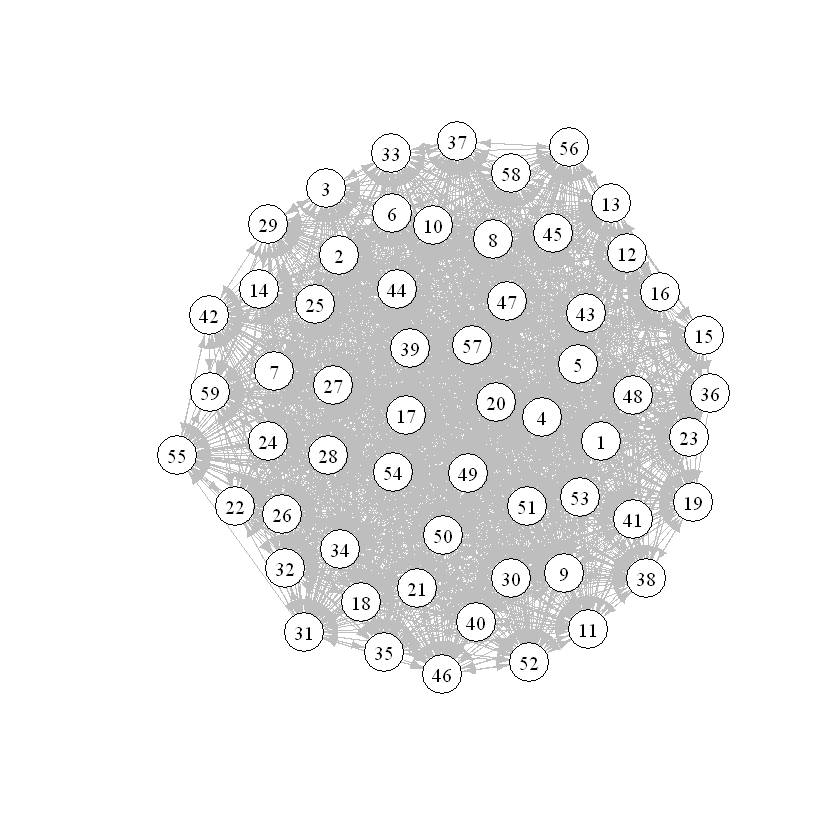

In [3]:
plot(graph, layout = layout_with_fr, 
     vertex.label = V(graph)$name,
     vertex.size = 15, 
     edge.arrow.size=.5,
     edge.arrow.color = "grey", 
     vertex.color= "white",
     vertex.label.color = "black", 
     edge.color = "grey")

Так как в данном примере значени $p$ достаточно большое, то количество рёбер в графе довольно велико. Для сравнения построим граф с намного меньшим значением $p$:

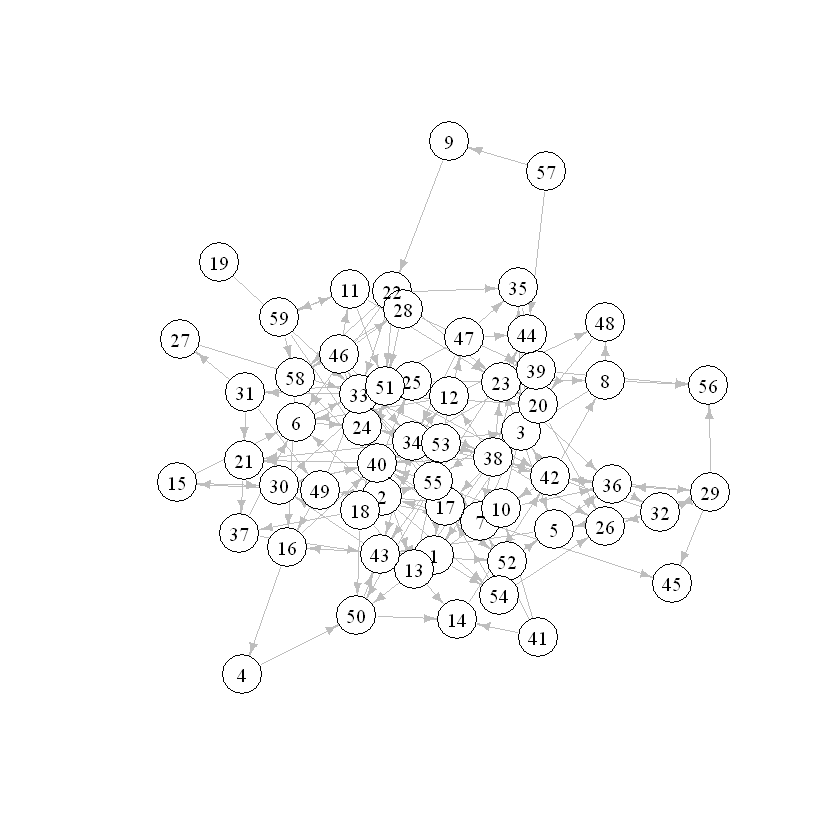

In [4]:
g_example <- erdos.renyi.game(g, 0.05, "gnp", directed = T)

plot(g_example, layout = layout_with_fr, 
     vertex.label = V(g_example)$name,
     vertex.size = 15, 
     edge.arrow.size=.5,
     edge.arrow.color = "grey", 
     vertex.color= "white",
     vertex.label.color = "black", 
     edge.color = "grey")

Видим, что геренируется граф с намного меньшим количеством рёбер.

**Задание 3.** Вычислим пятичисловую сводку сети для данного графа.

In [5]:
##Пятичисловая сводка
##Размер сети
cat("Размер сети: ", network.size(net), "\n")

##Плотность
cat("Плотность сети: ", gden(net), "\n")

##Компоненты
cat("Число компонент: ", components(net), "\n")

##Диаметр сети
cat("Диаметр сети: ", diameter(graph), "\n")

##Коэффициент кластеризации
cat("Коэффициент кластеризации: ", gtrans(net, mode = "graph"), "\n")

Размер сети:  59 
Плотность сети:  0.7574518 
Число компонент:  1 
Диаметр сети:  2 
Коэффициент кластеризации:  0.7557964 


Можно заметить, что плотность сети близка к значению $p = 0.76$.

**Задание 4.** Вычислим цензус диад для данной модели. 

In [6]:
census <- dyad_census(graph)
census

$mut
[1] 981

$asym
[1] 630

$null
[1] 100

Вывод:

Число взаимных диад (двунаправленных отношений) $M$ равно 981.

Число ассиметричных диад (однонаправленных отношений) $A$ равно 630.

Число пар акторов $N$, между которыми нет связи, равно 100.

**Задание 5.** Вычислим оценку индекса взаимности Каца-Пауэла при фиксированом количестве выборов 𝑑.

Положим $d = 40$. Каждый актор делает выбор из $(g - 1) = 58$ акторов.

In [7]:
d <- 40
M <- census$mut
rho1 <- (2*(g-1)*M - g * d^2)/(g*d*(g - 1 - d))
rho1

[1] 0.4565913

Видим, что при фиксированном выборе акторы более склонны образовывать взаимные связи. 

Вычислим оценку при свободном выборе.

In [17]:
adj_matrix <- as.matrix(as_adjacency_matrix(graph))
L <- sum(rowSums(adj_matrix))
L2 <- sum(rowSums(adj_matrix)^2)

rho2 <- (2*(g - 1)^2 * M - L^2 + L2)/(L*(g - 1)^2 - L^2 + L2)
rho2

[1] -0.001803825

Видим, что при свободном выборе акторы склонны образовывать односторонние связи или не образовывать их вообще.

**Задание 6.** Вычислим вероятность того, что связь будет взаимной для каждого случая.

In [9]:
#Вероятность для фиксированного выбора
P_fix <- (d / (g-1)) * ((d/(g-1)) + rho1*(g - 1 - d) / (g - 1))
P_fix

[1] 0.5733489

In [10]:
#Вероятность для свободного выбора
P_free <- (rowSums(adj_matrix) * colSums(adj_matrix))/(g - 1)^2
P_free_avg <- sum(P_free)/g
P_free_avg

[1] 0.5737973

**Задание 7.** Вычислим индекс взаимности Бандиопадхьяйя.

In [11]:
g_func <- function(row_sum, g, t) {
    xi_sum <- sum(row_sum[1:t])
    min_sum <- 0   
    for (i in (t+1):g) {
        min_sum <- min_sum + min(c(t, row_sum[i]))
    }
    res <- xi_sum - t*(t-1) - min_sum
    return(res)
}

f_func <- function(row_sum, g, t) {
    xi_sum <- sum(row_sum[1:t])
    combination <- factorial(t)/(factorial(2) * factorial(t-2))
    res <- xi_sum - t*(g-1) - combination 
    return(res)
}

row_sum <- rowSums(adj_matrix)

g_res <- rep(2, g - 1)
for (t in 2:(g-1)) {
    g_res[t] <- g_func(row_sum, g, t)
}

f_res <- rep(2, g)
for (t in 2:g) {
    f_res[t] <- f_func(row_sum, g, t)
}

M_max <- floor(0.5 * sum(row_sum[1:g]) - max(g_res))
M_min <- max(f_res)

B_index <- (M - M_min)/(M_max - M_min)
B_index

[1] 0.7577399

Видим, что полуенный индекс примерно равен $p = 0.76$. 

**Задание 8.** Проверим нулевую гипотезу о том, что число дуг $L$ в орграфе $\mathscr{G}_d$ имеет биномиальное распределение $L ∼ Bin(g(g − 1), \frac{1}{2})$ при уровне значимости $\alpha = 0.02$. Определим максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

In [12]:
alpha <- 0.02
l <- sum(adj_matrix)
binom.test(l, g*(g-1), p = 0.5)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 2592, number of trials = 3422, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.7427283 0.7717341
sample estimates:
probability of success 
             0.7574518 


Видим, что p-value много меньше $\alpha$. Значит, нулевая гипотеза не выполняется, и вероятность "успеха" (построения ребра между любыми двумя акторами) $p$ не равна 0.5. p-value является максимальным уровнем значимости, при котором гипотеза не отвергается. В данном случае этот уровень значимости очень мал: p-value $< 2.2 \cdot 10^{-16}$.

**Задание 9.** Проверим нулевую гипотезу о том, что число дуг $L$ в орграфе $\mathscr{G}_d$ имеет биномиальное распределение $L ∼ Bin(g(g−1), 𝑃_0), P_0 = 0.77$ при уровне значимости $\alpha = 0.02$. Определим максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

In [13]:
P0 <- 0.77
binom.test(l, g*(g-1), p = P0)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 2592, number of trials = 3422, p-value = 0.08424
alternative hypothesis: true probability of success is not equal to 0.77
95 percent confidence interval:
 0.7427283 0.7717341
sample estimates:
probability of success 
             0.7574518 


Видим, что p-value > $\alpha$. Значит, нулевая гипотеза выполняется. Действительно, для построения графа представленной модели положили $p = 0.76 \cong 0.77$. Максимальный уровень значимости, при котором гиптеза не отвергается: p-value = 0.08424.

**Задание 10.** Построим доверительный интервал для оценки параметра $p$ с доверительной надёжностью $(1 - \alpha)$.

In [14]:
#Оценка параметра p
p_est <- (sum(adj_matrix))/(g*(g-1))
p_est

[1] 0.7574518

Найдём $z_{\alpha/2}$. Для этого посчитаем значение функции Лапласа:

In [15]:
laplace <- 0.5 - (alpha/2)
laplace

[1] 0.49

Воспользуемся таблицей значений функции Лапласа и получим $z_{\alpha/2} \approx 2.34$.

In [16]:
z_a <- 2.34

#Доверительный интервал
p_lower <- p_est - z_a * sqrt((p_est * (1 - p_est))/(g * (g - 1)))
p_upper <- p_est + z_a * sqrt((p_est * (1 - p_est))/(g * (g - 1)))                      
p_lower
p_upper

[1] 0.7403062

[1] 0.7745974

Получаем доверительный интервал $0.74 \leqslant p \leqslant 0.77$. Зная, что $p = 0.76$, можем сделать вывод, что доверительный интервал вычислен верно с доверительной надёжностью $(1 - \alpha)$.

## Выводы

В ходе данной практической работы провели статистический анализ случайно смоделированного ориентированного графа с использованием библиотек igraph,  statnet и встроенных функций языка R. Проверена корректность посчитанных значений - большинство из них примерно равно входному значению $p$. Главной сложностью данной работы было то, что некоторые трудоёмкие для подсчёта значения (например, индекс взаимности Бандиопадхьяйя), не реализованы в представленных библиотеках. 